4. Neural Networks

Instruction 4: Provide an example of Varying regularization in Multi-layer Perceptron using
your dataset.

A comparison of different values for regularization parameter ‘alpha’ on synthetic datasets. The
plot shows that different alphas yield different decision functions. Alpha is a parameter for
regularization term, aka penalty term, that combats overfitting by constraining the size of the
weights. Increasing alpha may fix high variance (a sign of overfitting) by encouraging smaller
weights, resulting in a decision boundary plot that appears with lesser curvatures. Similarly,
decreasing alpha may fix high bias (a sign of underfitting) by encouraging larger weights,
potentially resulting in a more complicated decision boundary.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

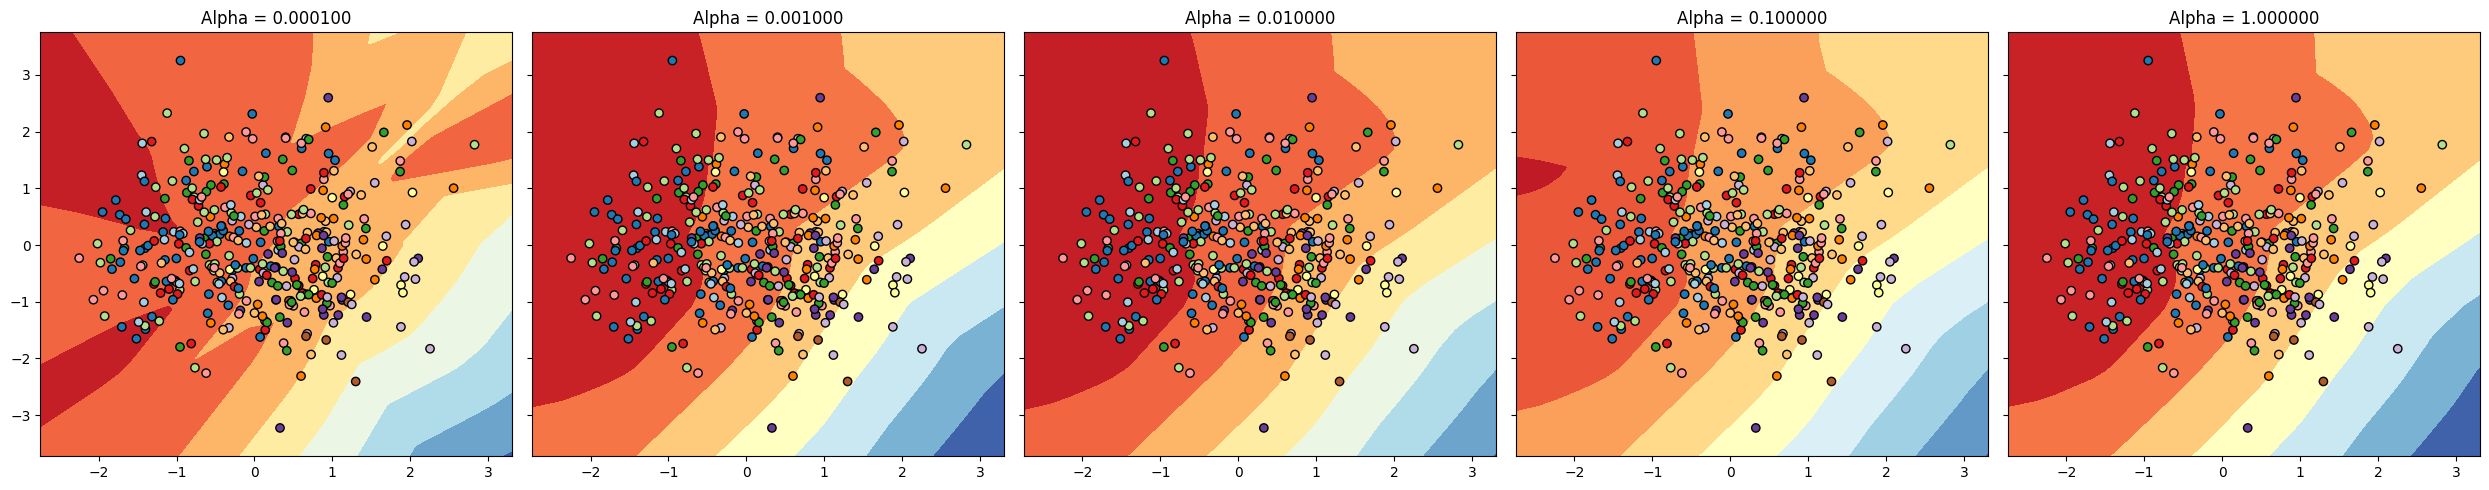

In [6]:
data = load_diabetes()
X = data.data
y = data.target

pca = PCA(n_components=2)
X = pca.fit_transform(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alphas = [0.0001, 0.001, 0.01, 0.1, 1]
models = []

for i in alphas:
    mlp = MLPRegressor(hidden_layer_sizes=(100, 50), alpha=i, random_state=42, max_iter=10000)
    mlp.fit(X_train, y_train)
    models.append(mlp)

fig, axes = plt.subplots(1, len(models), figsize=(5*len(models), 5), sharey=True)

for i, (alpha, ax) in enumerate(zip(alphas, axes)):
    h = .02  
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = models[i].predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
    ax.set_title("Alpha = %f" % alpha)

plt.tight_layout()
plt.show()